In [1]:
# Install and ensure we have the libraries needed.
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install seaborn
!pip install pandas

In [2]:
# Import libraries needed.
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score, classification_report, accuracy_score,f1_score
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix as cm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import neighbors 

In [3]:
#Import the raw dataset into Pandas and display it.
df=pd.read_csv('churn_raw_data.csv')
print(df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

In [4]:
#List total number of entries in dataset (RowsxColumn).
print(df.shape)

(10000, 52)


In [5]:
#Display the datatype for each column.
print(df.dtypes)

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

In [6]:
#Perform checks to see if null values exists.
print(df.isna().sum())

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [7]:
#Rename the columns named item1 item2, etc.
df=df.rename({'item1' : 'Timely_Response',
                    'item2' : 'Timely_Fixes',
                    'item3' : 'Timely_Replacement',
                    'item4' : 'Reliability',
                    'item5' : 'Options',
                    'item6' : 'Respectable_Response',
                    'item7' : 'Courteous_Exchange',
                    'item8' : 'Evidence_of_active_listening'}, axis='columns')

In [8]:
#Look at the basic statistics of the dataset.
df[['Churn', 'Area','Employment','Income','Contract',
        'Timely_Fixes','Timely_Replacement','Reliability','Options',
        'Respectable_Response','Courteous_Exchange','Evidence_of_active_listening']].describe()

,Income,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening
count,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39936.762226,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,28358.469482,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,740.660000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19285.522500,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,33186.785000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,53472.395000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,258900.700000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [9]:
#Create new datafrane and drop all unused columns for our analysis
dflog=df.drop(['Unnamed: 0','Age','CaseOrder','Customer_id','Interaction','City','State',
               'County','Zip','Lat','Lng','Population','Timezone','Job',
               'Children','Education','Marital', 'Outage_sec_perweek',
               'Email','Contacts','Yearly_equip_failure', 'Gender','PaperlessBilling',
               'MonthlyCharge','PaymentMethod',
               'Techie','Port_modem','Tablet', 'Tenure', 'Bandwidth_GB_Year'], axis = 1)

dflog

,Area,Employment,Income,Churn,Contract,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening
0,Urban,Part Time,28561.99,No,One year,Fiber Optic,Yes,No,Yes,Yes,...,No,Yes,5,5,5,3,4,4,3,4
1,Urban,Retired,21704.77,Yes,Month-to-month,Fiber Optic,Yes,Yes,Yes,No,...,Yes,Yes,3,4,3,3,4,3,4,4
2,Urban,Student,NaN,No,Two Year,DSL,Yes,Yes,No,No,...,No,Yes,4,4,2,4,4,3,3,3
3,Suburban,Retired,18925.23,No,Two Year,DSL,Yes,No,Yes,No,...,Yes,No,4,4,4,2,5,4,3,3
4,Suburban,Student,40074.19,Yes,Month-to-month,Fiber Optic,No,No,No,No,...,Yes,No,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Retired,55723.74,No,Month-to-month,DSL,NaN,Yes,No,Yes,...,No,No,3,2,3,3,4,3,2,3
9996,Rural,Part Time,NaN,No,Two Year,Fiber Optic,NaN,Yes,Yes,Yes,...,Yes,No,4,5,5,4,4,5,2,5
9997,Rural,Full Time,NaN,No,Month-to-month,Fiber Optic,Yes,Yes,Yes,Yes,...,No,No,4,4,4,4,4,4,4,5
9998,Urban,Full Time,16667.58,No,Two Year,Fiber Optic,No,Yes,No,No,...,Yes,Yes,4,4,6,4,3,3,5,4


In [10]:
#Check for duplicate rows
dflog.duplicated().sum()

0

In [11]:
#Drop duplicate rows
dflog=dflog.drop_duplicates(keep='first')

In [12]:
#Check for duplicate rows
dflog.duplicated().unique()

array([False])

In [13]:
#Next we look at the unique string value from categorical columns that can be potentially recoded.
#A potential variable is any variable that is: easily understood, easily describable and can be methodologically recoded.
dflog['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
dflog['Area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [15]:
dflog['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [16]:
dflog['Contract'].unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [17]:
dflog['InternetService'].unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [18]:
dflog['Phone'].unique()

array(['Yes', 'No', nan], dtype=object)

In [19]:
dflog['Multiple'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
dflog['OnlineSecurity'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
dflog['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
dflog['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
dflog['TechSupport'].unique()

array(['No', 'Yes', nan], dtype=object)

In [24]:
dflog['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
dflog['StreamingMovies'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
#Once we know the unique values for the categorical columns we want to change,
#we'll perform the necessary codes on them. First we'll change all binary values and the 'InternetService'
#column to 1 or 0. 
#We'll also fill NaN value for column 'TechSupport', 'Phone' with 0 as we will assume that these
#value were left empty as they did not apply to the customer.

dflog=dflog.replace(['Yes','Fiber Optic', 'DSL','Male'],'1')
dflog=dflog.replace(['No', 'None'],'0')
dflog[['TechSupport', 'Phone']] = dflog[['TechSupport', 'Phone']].fillna(value=0)
dflog=dflog.astype({'Churn': 'float64',              
              'InternetService': 'float64', 
              'Phone': 'float64',
              'Multiple': 'float64',
              'OnlineSecurity': 'float64',
              'OnlineBackup': 'float64',
              'DeviceProtection': 'float64',
              'TechSupport': 'float64',
              'StreamingTV': 'float64',
              'StreamingMovies': 'float64',})


In [27]:
#Recode Area with 'Urban'=2, 'Suburban'=1, 'Rural'=0. Also convert datatype to float.
dflog=dflog.replace(['Urban'] ,'2');
dflog=dflog.replace(['Suburban'],'1');
dflog=dflog.replace(['Rural'],'0');
dflog=dflog.astype({'Area': 'float64'})
print(dflog['Area'])

0       2.0
1       2.0
2       2.0
3       1.0
4       1.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    2.0
9999    2.0
Name: Area, Length: 10000, dtype: float64


In [28]:
#Recode Employment 'Retired' from 4 to 'Unemployed' at 0. Also convert datatype to float.

dflog=dflog.replace(['Retired'] ,'4');
dflog=dflog.replace(['Full Time'] ,'3');
dflog=dflog.replace(['Part Time'] ,'2');
dflog=dflog.replace(['Student'],'1');
dflog=dflog.replace(['Unemployed'],'0');
dflog=dflog.astype({'Employment': 'float64'})
print(dflog['Employment'])

0       2.0
1       4.0
2       1.0
3       4.0
4       1.0
       ... 
9995    4.0
9996    2.0
9997    3.0
9998    3.0
9999    3.0
Name: Employment, Length: 10000, dtype: float64


In [29]:
#Recode Contract with 'Two Year'=2, 'One year'=1, 'Month-to-month'=0. Also convert datatype to float.

dflog=dflog.replace(['Two Year'],'2');
dflog=dflog.replace(['One year'],'1');
dflog=dflog.replace(['Month-to-month'],'0');
dflog=dflog.astype({'Contract': 'float64'})
print(dflog['Contract'])

0       1.0
1       0.0
2       2.0
3       2.0
4       0.0
       ... 
9995    0.0
9996    2.0
9997    0.0
9998    2.0
9999    0.0
Name: Contract, Length: 10000, dtype: float64


In [30]:
#Impute missing values for 'Income', with mean values.
#Print to see if there is still in any null values.
dflog['Income'] = dflog['Income'].fillna(dflog['Income'].mean())

print(dflog.isna().sum())

Area                            0
Employment                      0
Income                          0
Churn                           0
Contract                        0
InternetService                 0
Phone                           0
Multiple                        0
OnlineSecurity                  0
OnlineBackup                    0
DeviceProtection                0
TechSupport                     0
StreamingTV                     0
StreamingMovies                 0
Timely_Response                 0
Timely_Fixes                    0
Timely_Replacement              0
Reliability                     0
Options                         0
Respectable_Response            0
Courteous_Exchange              0
Evidence_of_active_listening    0
dtype: int64


In [31]:
#Add up all the rows in each Service Column into a new Column called 'Sum_services'.

dflog['Sum_services'] = dflog['InternetService'] + dflog['Phone'] + dflog['Multiple'] + \
dflog['OnlineSecurity'] +dflog['OnlineBackup'] + dflog['DeviceProtection'] +dflog['TechSupport'] +\
dflog['StreamingTV'] + dflog['StreamingMovies']

print(dflog['Sum_services'] )

0       5.0
1       6.0
2       4.0
3       4.0
4       3.0
       ... 
9995    4.0
9996    6.0
9997    5.0
9998    5.0
9999    7.0
Name: Sum_services, Length: 10000, dtype: float64


In [32]:
#Remove the Services Columns as we are done with them
dflog=dflog.drop(['InternetService','Phone','Multiple','OnlineSecurity',
               'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], axis = 1)

In [33]:
#Look at central tendicies of new column 'Sum_services'.
dflog['Sum_services'].describe()

count    10000.000000
mean         4.626800
std          1.423982
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Sum_services, dtype: float64

In [34]:
#Get summary statistics on final cleaned dataset
dflog.describe()

,Area,Employment,Income,Churn,Contract,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000000,2.506800,39936.762226,0.265000,0.698600,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600,4.626800
std,0.815761,1.113408,24575.114845,0.441355,0.836079,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633,1.423982
min,0.000000,0.000000,740.660000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,2.000000,23660.790000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,3.000000,39936.762226,0.000000,0.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,5.000000
75%,2.000000,3.000000,45504.192500,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000
max,2.000000,4.000000,258900.700000,1.000000,2.000000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000,9.000000


In [35]:
#Create Z-Score of 'Sum_services' and put it into 'Z_ScoreServices' column and new variable df_z. Print Z-Score higher than 3.
dflog['Z_ScoreServices']=stats.zscore(dflog['Sum_services'])
df_z=dflog['Z_ScoreServices']
print(np.where(df_z > 3))

(array([  75,  798, 1430, 2275, 3425, 3770, 4055, 4489, 4676, 4927, 5257,
       5592, 6507, 6878, 7529, 7696, 9734], dtype=int64),)


In [36]:
#Confirm that column 'Z_ScoreServices' position 75's Z-Score is over 3.
print (df_z.iloc[75])

3.0712599571175825


In [37]:
#Declare a new variable df_cln to remove rows with Z-Score higher 3 and lower than -3. Print to ensure removal.
df_cln = dflog
df_cln = df_cln[(df_z < 3) & (df_z > -3)]

print (df_cln['Z_ScoreServices'].iloc[75])


-0.4401961358093162


In [38]:
#Double Check no Z-Score higher than 3 or less than -3
print (df_cln['Z_ScoreServices'].sort_values(ascending=False))

219     2.368969
3228    2.368969
8016    2.368969
8003    2.368969
7979    2.368969
          ...   
9868   -2.547070
6434   -2.547070
4602   -2.547070
4607   -2.547070
7522   -2.547070
Name: Z_ScoreServices, Length: 9978, dtype: float64


In [39]:
#One last look at the dataframe
df_cln

,Area,Employment,Income,Churn,Contract,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services,Z_ScoreServices
0,2.0,2.0,28561.990000,0.0,1.0,5,5,5,3,4,4,3,4,5.0,0.262095
1,2.0,4.0,21704.770000,1.0,0.0,3,4,3,3,4,3,4,4,6.0,0.964386
2,2.0,1.0,39936.762226,0.0,2.0,4,4,2,4,4,3,3,3,4.0,-0.440196
3,1.0,4.0,18925.230000,0.0,2.0,4,4,4,2,5,4,3,3,4.0,-0.440196
4,1.0,1.0,40074.190000,1.0,0.0,4,4,4,3,4,4,4,5,3.0,-1.142487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,4.0,55723.740000,0.0,0.0,3,2,3,3,4,3,2,3,4.0,-0.440196
9996,0.0,2.0,39936.762226,0.0,2.0,4,5,5,4,4,5,2,5,6.0,0.964386
9997,0.0,3.0,39936.762226,0.0,0.0,4,4,4,4,4,4,4,5,5.0,0.262095
9998,2.0,3.0,16667.580000,0.0,2.0,4,4,6,4,3,3,5,4,5.0,0.262095


In [40]:
#Now that we have removed the observations with outliers, we no longer need the Z_score column 
#and will remove it so we can proceed to our analysis
df_cln=df_cln.drop(['Z_ScoreServices'],axis = 1)

In [41]:
#Review the new dataframe's summary statistics
df_cln.describe()

,Area,Employment,Income,Churn,Contract,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services
count,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.00000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000
mean,1.000702,2.507216,39954.802691,0.264281,0.697935,3.49078,3.504710,3.486170,3.497895,3.492884,3.497194,3.510122,3.495791,4.621668
std,0.815616,1.113215,24581.323593,0.440972,0.836041,1.03771,1.034742,1.027857,1.025995,1.024996,1.033683,1.028582,1.029013,1.410267
min,0.000000,0.000000,740.660000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,23670.642500,0.000000,0.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,3.000000,39936.762226,0.000000,0.000000,3.00000,4.000000,3.000000,3.500000,3.000000,3.000000,4.000000,3.000000,5.000000
75%,2.000000,3.000000,45512.015000,1.000000,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000
max,2.000000,4.000000,258900.700000,1.000000,2.000000,7.00000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000,8.000000


<AxesSubplot:xlabel='Churn', ylabel='Sum_services'>

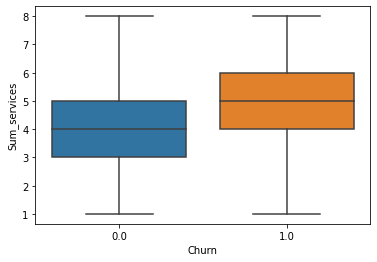

In [42]:
#Perform BoxPlot to find Outliers of Sum_services.
sns.boxplot(x='Churn', y='Sum_services', data=df_cln)

array([[<AxesSubplot:title={'center':'Sum_services'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Employment'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'Timely_Fixes'}>],
       [<AxesSubplot:title={'center':'Timely_Replacement'}>,
        <AxesSubplot:title={'center':'Reliability'}>,
        <AxesSubplot:title={'center':'Options'}>],
       [<AxesSubplot:title={'center':'Respectable_Response'}>,
        <AxesSubplot:title={'center':'Courteous_Exchange'}>,
        <AxesSubplot:title={'center':'Evidence_of_active_listening'}>]],
      dtype=object)

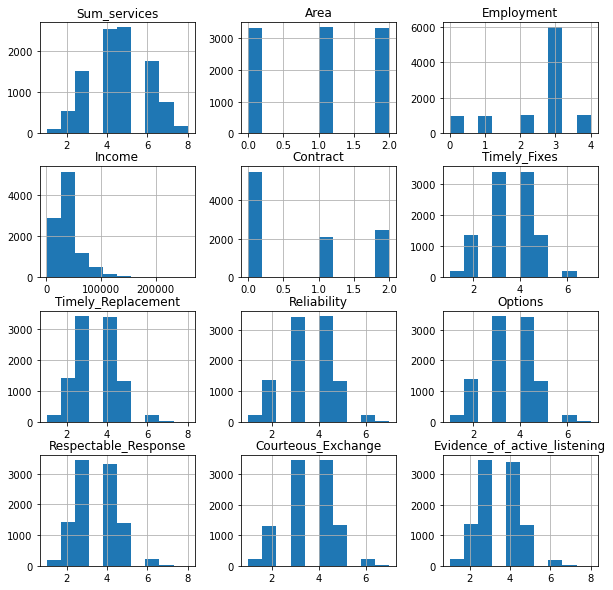

In [43]:
#Perform Univariate Analysis histogram on all predictor variables.
df_cln[['Sum_services','Area','Employment','Income','Contract',
        'Timely_Fixes','Timely_Replacement','Reliability','Options',
        'Respectable_Response','Courteous_Exchange','Evidence_of_active_listening']].hist(figsize=(10,10),bins=10)

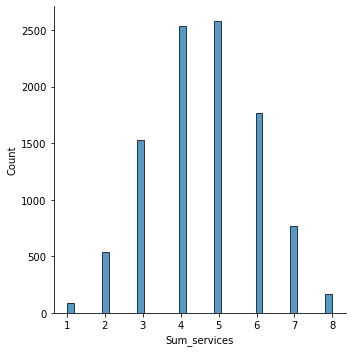

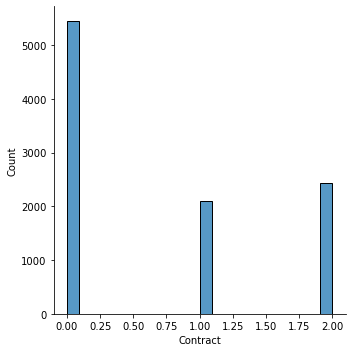

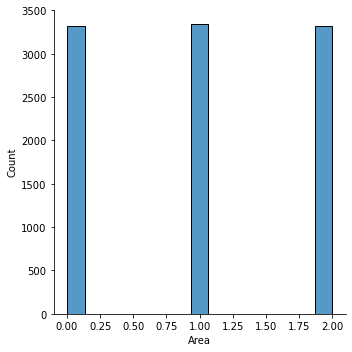

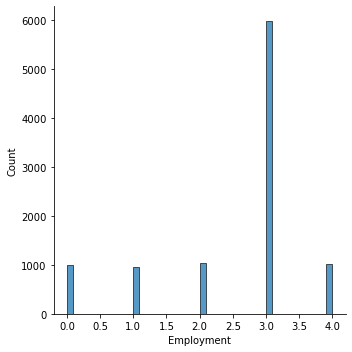

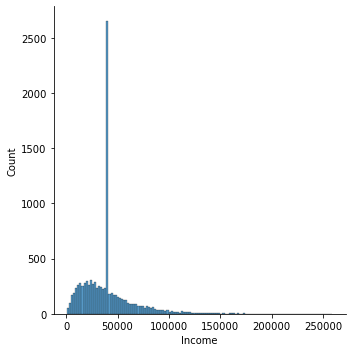

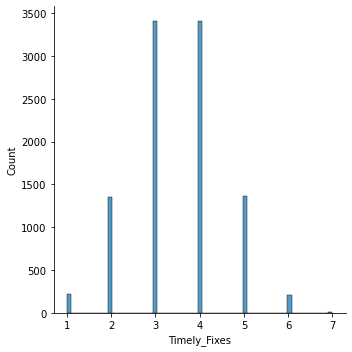

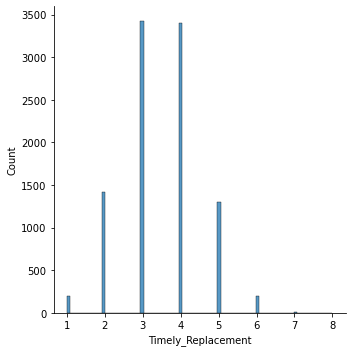

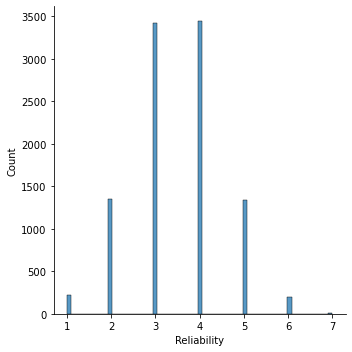

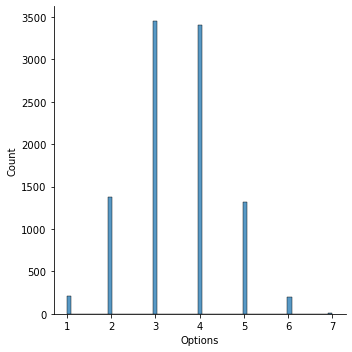

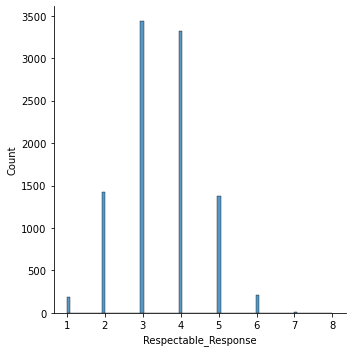

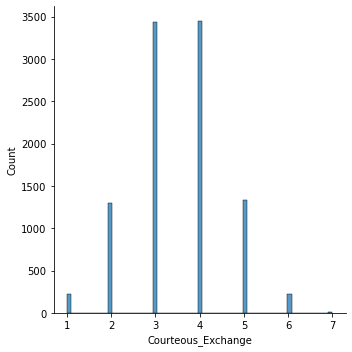

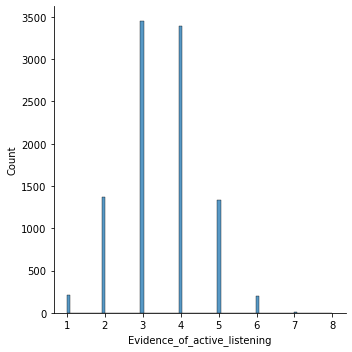

In [44]:
#Create a displot for all predictor variable.
sns.displot(df_cln['Sum_services'])
sns.displot(df_cln['Contract'])
sns.displot(df_cln['Area'])
sns.displot(df_cln['Employment'])
sns.displot(df_cln['Income'])
sns.displot(df_cln['Timely_Fixes'])
sns.displot(df_cln['Timely_Replacement'])
sns.displot(df_cln['Reliability'])
sns.displot(df_cln['Options'])
sns.displot(df_cln['Respectable_Response'])
sns.displot(df_cln['Courteous_Exchange'])
sns.displot(df_cln['Evidence_of_active_listening'])

<AxesSubplot:xlabel='Sum_services'>

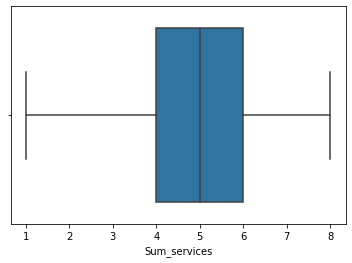

In [45]:
#Create Boxplot for 'Sum_services'.
sns.boxplot(x='Sum_services', data=df_cln)

<AxesSubplot:xlabel='Income'>

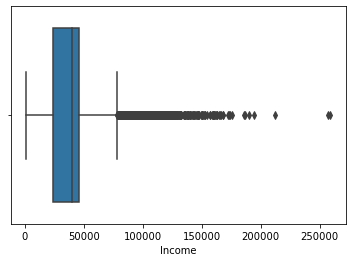

In [46]:
#Create Boxplot for 'Income'.
sns.boxplot(x='Income', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Sum_services'>

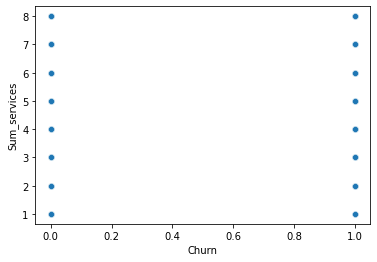

In [47]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Sum_services', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Contract'>

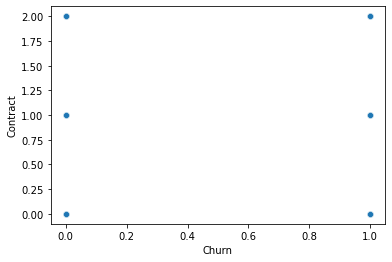

In [48]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Contract', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Area'>

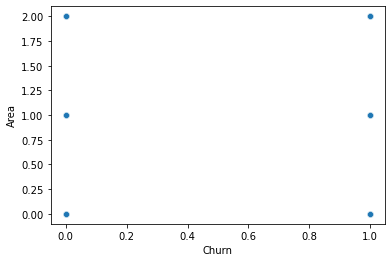

In [49]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Area', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Employment'>

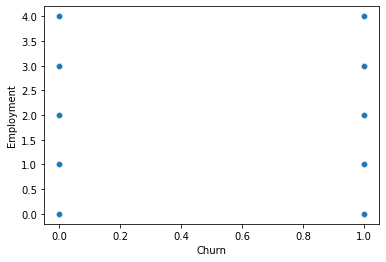

In [50]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Employment', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Income'>

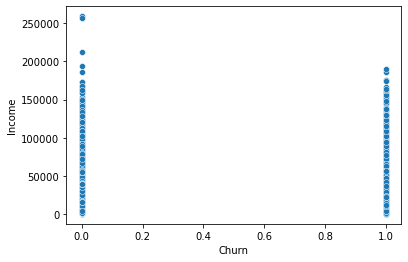

In [51]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Income', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Timely_Fixes'>

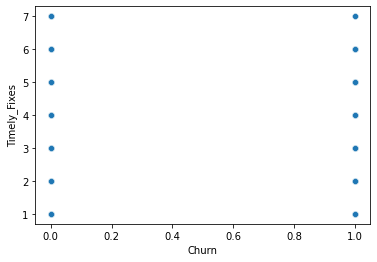

In [52]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Timely_Fixes', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Timely_Replacement'>

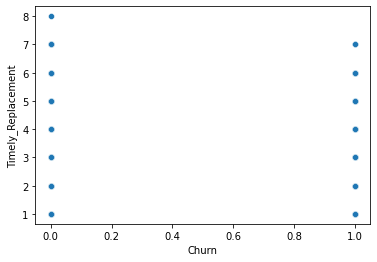

In [53]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Timely_Replacement', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Reliability'>

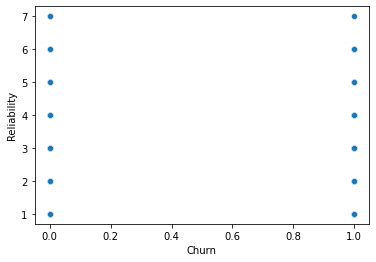

In [54]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Reliability', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Options'>

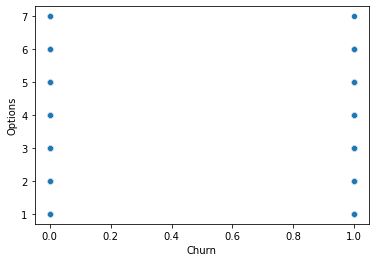

In [55]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Options', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Respectable_Response'>

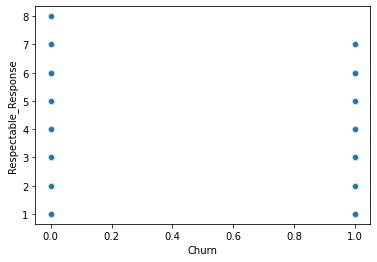

In [56]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Respectable_Response', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Courteous_Exchange'>

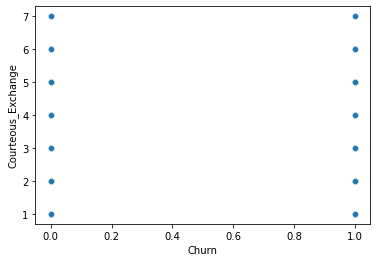

In [57]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Courteous_Exchange', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Evidence_of_active_listening'>

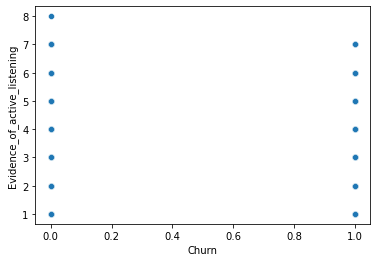

In [58]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Evidence_of_active_listening', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Sum_services'>

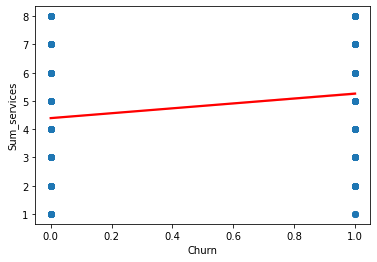

In [59]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Sum_services', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Contract'>

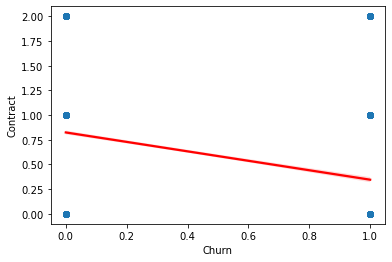

In [60]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Contract', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Area'>

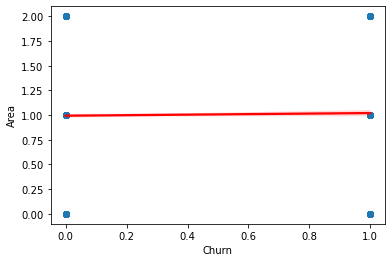

In [61]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Area', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Employment'>

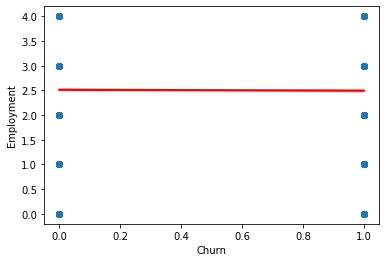

In [62]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Employment', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Income'>

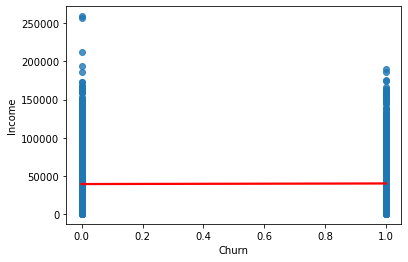

In [63]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Income', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Timely_Fixes'>

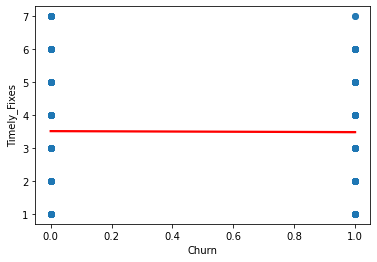

In [64]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Timely_Fixes', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Timely_Replacement'>

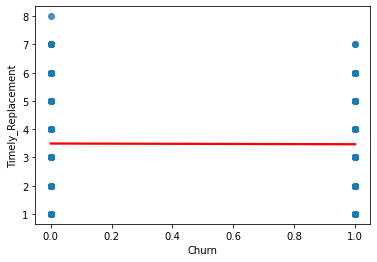

In [65]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Timely_Replacement', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Reliability'>

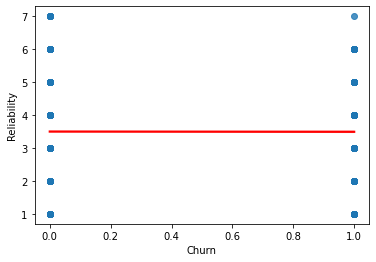

In [66]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Reliability', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Options'>

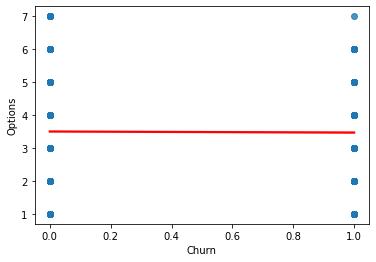

In [67]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Options', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Respectable_Response'>

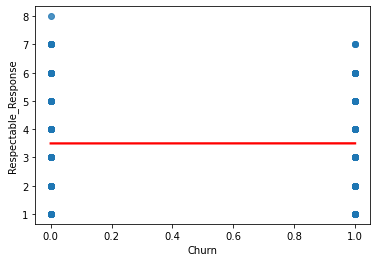

In [68]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Respectable_Response', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Courteous_Exchange'>

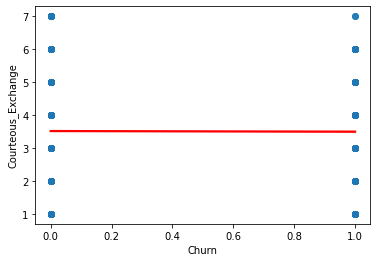

In [69]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Courteous_Exchange', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Evidence_of_active_listening'>

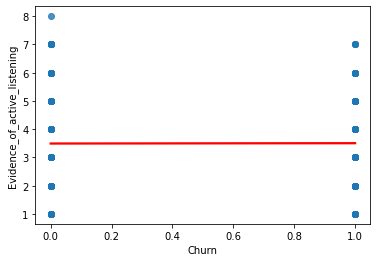

In [70]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Evidence_of_active_listening', data=df_cln, line_kws={"color": "red"})

In [71]:
#Export cleaned dataset to a new CSV file
df_cln.to_csv('D209_Cleaned_Dataset_T1.csv')


In [72]:
#Create Dummy Variables for Categorical Variables
d_var=pd.get_dummies(df[['Area','Employment','Contract']], prefix="Dummy")
d_var

,Dummy_Rural,Dummy_Suburban,Dummy_Urban,Dummy_Full Time,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_Month-to-month,Dummy_One year,Dummy_Two Year
0,0,0,1,0,1,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,1,0,0,1,0,0
9996,1,0,0,0,1,0,0,0,0,0,1
9997,1,0,0,1,0,0,0,0,1,0,0
9998,0,0,1,1,0,0,0,0,0,0,1


In [74]:
#Add the dummy variable to a new df. Drop the rows that has null values and create copy of the data frame.
df_model=pd.concat([df_cln,d_var], axis=1)
df_model=df_model.dropna()
logit_clndf=df_model
df_model=df_model.drop(['Area','Employment','Contract','Churn'], axis=1)
df_model

,Income,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services,...,Dummy_Suburban,Dummy_Urban,Dummy_Full Time,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_Month-to-month,Dummy_One year,Dummy_Two Year
0,28561.990000,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,5.0,...,0,1,0,1,0,0,0,0,1,0
1,21704.770000,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,6.0,...,0,1,0,0,1,0,0,1,0,0
2,39936.762226,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,...,0,1,0,0,0,1,0,0,0,1
3,18925.230000,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0,4.0,...,1,0,0,0,1,0,0,0,0,1
4,40074.190000,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,3.0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55723.740000,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,4.0,...,0,0,0,0,1,0,0,1,0,0
9996,39936.762226,4.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,6.0,...,0,0,0,1,0,0,0,0,0,1
9997,39936.762226,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,...,0,0,1,0,0,0,0,1,0,0
9998,16667.580000,4.0,4.0,6.0,4.0,3.0,3.0,5.0,4.0,5.0,...,0,1,1,0,0,0,0,0,0,1


In [75]:
#Review the dataframe
df_model.shape

(9978, 21)

In [76]:
#Summary statistic for dataset use in regression analysis
df_model.describe()

,Income,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services,...,Dummy_Suburban,Dummy_Urban,Dummy_Full Time,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_Month-to-month,Dummy_One year,Dummy_Two Year
count,9978.000000,9978.00000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,...,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000
mean,39954.802691,3.49078,3.504710,3.486170,3.497895,3.492884,3.497194,3.510122,3.495791,4.621668,...,0.334837,0.332932,0.599419,0.104029,0.101122,0.096412,0.099018,0.546101,0.209862,0.244037
std,24581.323593,1.03771,1.034742,1.027857,1.025995,1.024996,1.033683,1.028582,1.029013,1.410267,...,0.471957,0.471286,0.490041,0.305313,0.301506,0.295170,0.298701,0.497895,0.407230,0.429536
min,740.660000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23670.642500,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39936.762226,3.00000,4.000000,3.000000,3.500000,3.000000,3.000000,4.000000,3.000000,5.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,45512.015000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,258900.700000,7.00000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
#Create new varaible for Predictor and Target Variable
X=df_model
y=df_cln[['Churn']]
X

,Income,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services,...,Dummy_Suburban,Dummy_Urban,Dummy_Full Time,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_Month-to-month,Dummy_One year,Dummy_Two Year
0,28561.990000,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,5.0,...,0,1,0,1,0,0,0,0,1,0
1,21704.770000,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,6.0,...,0,1,0,0,1,0,0,1,0,0
2,39936.762226,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,...,0,1,0,0,0,1,0,0,0,1
3,18925.230000,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0,4.0,...,1,0,0,0,1,0,0,0,0,1
4,40074.190000,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,3.0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55723.740000,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,4.0,...,0,0,0,0,1,0,0,1,0,0
9996,39936.762226,4.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,6.0,...,0,0,0,1,0,0,0,0,0,1
9997,39936.762226,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,...,0,0,1,0,0,0,0,1,0,0
9998,16667.580000,4.0,4.0,6.0,4.0,3.0,3.0,5.0,4.0,5.0,...,0,1,1,0,0,0,0,0,0,1


In [78]:
# Create train/test sets and export them
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.to_csv('Tele_Churn_X_train.csv',index=False)
X_test.to_csv('Tele_Churn_X_test.csv',index=False)
y_train.to_csv('Tele_Churn_y_train.csv',index=False)
y_test.to_csv('Tele_Churn_y_test.csv',index=False)

In [79]:
#KNN Model
knn=KNeighborsClassifier()

#Fit KNN model
knn.fit(X_train,np.ravel(y_train))

#Print Accuracy score of initial model
knn.score(X_test,np.ravel(y_test))

0.6783567134268537

In [80]:
# Set range of neighbors and create a standard pipeline
k_range = range(1, 51)
pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("knn",KNeighborsClassifier())])

#Initialize parameters to k_range
parameters = {'knn__n_neighbors':k_range}

# Initialize Grid_pipeline
grid_pipeline = GridSearchCV(pipeline,parameters,scoring='accuracy')

# Fit Grid_pipeline
grid_pipeline.fit(X_train,np.ravel(y_train))

#Create Scale/Unscale variables
knn_scale=pipeline.fit(X_train, np.ravel(y_train))
knn_unscale=knn.fit(X_train,np.ravel(y_train))

#Print differences in scale/unscale data
print('Scale Data Accuracy Score: ',knn_scale.score(X_test,np.ravel(y_test)))
print('Unscale Data Accuracy Score: ',knn_unscale.score(X_test,np.ravel(y_test)))

Scale Data Accuracy Score:  0.7099198396793587
Unscale Data Accuracy Score:  0.6783567134268537


In [81]:
#Find the best n_neighbor parameter using grid_pipeline variable
print(grid_pipeline.best_params_)

{'knn__n_neighbors': 45}


In [82]:
# Initialize a new KNN with new n_neighbor parameter
knn2=KNeighborsClassifier(n_neighbors=45)

In [83]:
# Setup the pipeline with new parameters
steps2 = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=45))]
        
# Create the pipeline2
pipeline2 = Pipeline(steps2)

#Create Scale/Unscale variables
knn_scale2=pipeline2.fit(X_train, np.ravel(y_train))
knn_unscale2=knn2.fit(X_train,np.ravel(y_train))

In [84]:
#Print differences in scale/unscale data
print('Scale Data Accuracy Score: ',knn_scale.score(X_test,np.ravel(y_test)))
print('Unscale Data Accuracy Score: ',knn_unscale.score(X_test,np.ravel(y_test)))
print('\n')
#Print differences in scale/unscale data
print('Scale Data with new parameter Accuracy Score: ',knn_scale2.score(X_test,np.ravel(y_test)))
print('Unscale Data with new parameter Accuracy Score: ',knn_unscale2.score(X_test,np.ravel(y_test)))

Scale Data Accuracy Score:  0.7099198396793587
Unscale Data Accuracy Score:  0.6783567134268537


Scale Data with new parameter Accuracy Score:  0.7354709418837675
Unscale Data with new parameter Accuracy Score:  0.7344689378757515


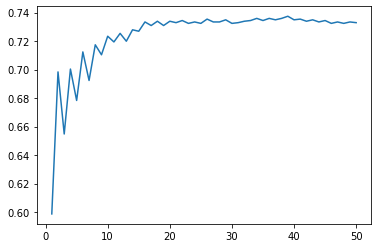

In [85]:
#Visualize KNN Model unscale data graph

#Initialize variables
k_scores=[]
kk= range(1,51)

# For loop to grab acurracy score at each k-level
for k in kk:    
    knn3 = KNeighborsClassifier(n_neighbors=k)
    knn3.fit(X_train,np.ravel(y_train))
    k_scores.append(knn3.score(X_test, np.ravel(y_test)))
    #print(knn3.score(X_test, np.ravel(y_test)))
     
# Plot K_range and K_scores
sns.lineplot(x=kk,y=k_scores)
plt.show()

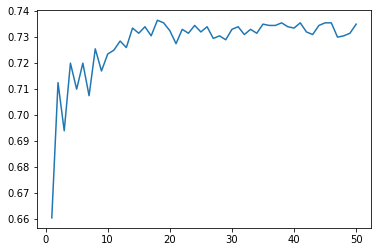

In [86]:
#Visualize KNN Model scaled data graph

#Initialize parameters
k_scores2=[]
kk= range(1,51)

# For loop to grab acurracy score at each k-level
for k in kk:    
    # Setup the pipeline with new parameters
    steps3 = [('scaler', StandardScaler()),
              ('knn', KNeighborsClassifier(n_neighbors=k))]  
    # Create the pipeline2
    pipeline3 = Pipeline(steps3)
    knn4_scale=pipeline3.fit(X_train, np.ravel(y_train))
    k_scores2.append(knn4_scale.score(X_test,np.ravel(y_test)))
    #print(knn4_scale.score(X_test,np.ravel(y_test)))
     
# Plot K_range and K_scores
sns.lineplot(x=kk,y=k_scores2)
plt.show()

In [87]:
#Predict using unscaled data with new parameter n_neighbor=45
y_pred=knn2.predict(X_test)

#Predict using scaled data with new parameter n_neighbor=45
y_pred_scaled=pipeline2.predict(X_test)

In [88]:
#Print classification report for Unscaled
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.99      0.85      1458
         1.0       0.62      0.04      0.07       538

    accuracy                           0.73      1996
   macro avg       0.68      0.51      0.46      1996
weighted avg       0.71      0.73      0.64      1996



In [89]:
#Print classification report for Scaled
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84      1458
         1.0       0.57      0.08      0.13       538

    accuracy                           0.74      1996
   macro avg       0.66      0.53      0.49      1996
weighted avg       0.70      0.74      0.65      1996



In [90]:
#Create confusion matrix
c_m=cm(y_test, y_pred_scaled)
print(c_m)

#Check Accuracy/Sensitivity/Specifity of the Confusion Matrix
TN = c_m[0,0]
TP = c_m[1,1]
FN = c_m[1,0]
FP = c_m[0,1]

# Calculate and print the accuracy
accuracy = (TN+TP)/(TN+TP+FN+FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity. Correctly identify as TP
sensitivity = (TP/(FN+TP))
print("sensitivity: ", sensitivity)

# Calculate and print the specificity.  Correctly identify as TN
specificity = (TN/(TN+FP))
print("specificity: ", specificity)

[[1427   31]
 [ 497   41]]
accuracy:  0.7354709418837675
sensitivity:  0.0762081784386617
specificity:  0.9787379972565158


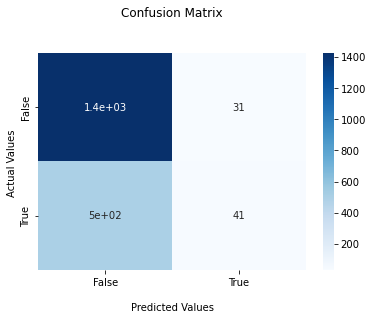

In [91]:
#Plot a Heatmap of the confusion matrix
cm_heat = sns.heatmap(c_m, annot=True, cmap='Blues')
cm_heat.set_title('Confusion Matrix\n\n');
cm_heat.set_xlabel('\nPredicted Values')
cm_heat.set_ylabel('Actual Values ');
cm_heat.xaxis.set_ticklabels(['False','True'])
cm_heat.yaxis.set_ticklabels(['False','True'])
plt.show()

In [92]:
#Prediction KNN
predictions = pipeline2.predict_proba(X_test)
predictions_target=predictions[:,1]
print(predictions_target[0:5])

[0.33333333 0.13333333 0.26666667 0.31111111 0.28888889]


In [93]:
#Calculate auc Score
auc = roc_auc_score(y_test, predictions_target)
print(round(auc,2))

0.71


In [94]:
#Cross validation
c_valid = cross_val_score(pipeline2, X_test, np.ravel(y_test), cv=10, scoring='accuracy')

#Print Cross Validation
print('10-Fold cross-validation', c_valid)

10-Fold cross-validation [0.73       0.725      0.735      0.72       0.74       0.715
 0.72864322 0.71356784 0.73869347 0.72864322]
